<a href="https://colab.research.google.com/github/NacliNaclo/EDOS/blob/main/penguins_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [280]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [281]:
# Import other libraries
import pandas as pd #to manage datasaet
import seaborn as sns #nice plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #dataset fo flower
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #attention

In [282]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-----------------------------------------------------------

In [283]:
data = pd.read_csv('/content/drive/MyDrive/[2023-2024] AN2DL/Lecture 1/penguins.csv')

In [284]:
data.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,FEMALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,MALE
260,Gentoo,Biscoe,42.7,13.7,208.0,3950.0,FEMALE
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE


In [285]:
print(data.shape)

(344, 7)


In [286]:
data.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [287]:
print(data.isnull())

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2          False  False  
3      

In [288]:
data_drop = data.dropna(axis=0)

In [289]:
print(data_drop.shape)

(333, 7)


In [290]:
data_drop.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [291]:
X_dataset = data_drop.drop('species', axis=1)
Y_dataset = data_drop['species']

In [292]:
X_dataset = X_dataset.reset_index()

In [293]:
X_numer = X_dataset[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [294]:
X_numer

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [295]:
Y_dataset

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [296]:
from sklearn.preprocessing import OneHotEncoder

In [297]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [298]:
encoder.fit(data_drop[["species"]])

OneHotEncoder(handle_unknown='ignore')

In [299]:
dummy = encoder.transform(data_drop[["species"]]).toarray()

In [300]:
Y_dataset =pd.DataFrame(dummy,columns=encoder.categories_)

In [301]:
Y_dataset

,Adelie,Chinstrap,Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
328,0.0,0.0,1.0
329,0.0,0.0,1.0
330,0.0,0.0,1.0
331,0.0,0.0,1.0


In [302]:
encoder.fit(X_dataset[["island"]])

OneHotEncoder(handle_unknown='ignore')

In [303]:
dummy = encoder.transform(X_dataset[["island"]]).toarray()

In [304]:
X_island =pd.DataFrame(dummy,columns=encoder.categories_)

In [305]:
encoder.fit(X_dataset[["sex"]])

OneHotEncoder(handle_unknown='ignore')

In [306]:
dummy = encoder.transform(X_dataset[["sex"]]).toarray()

In [307]:
X_sex =pd.DataFrame(dummy,columns=encoder.categories_)

In [308]:
X_island

,Biscoe,Dream,Torgersen
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
328,1.0,0.0,0.0
329,1.0,0.0,0.0
330,1.0,0.0,0.0
331,1.0,0.0,0.0


In [309]:
X_sex

,FEMALE,MALE
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
328,1.0,0.0
329,1.0,0.0
330,0.0,1.0
331,1.0,0.0


In [310]:
data_final = pd.concat([X_numer, X_sex, X_island], axis=1)

In [311]:
data_final

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,"(FEMALE,)","(MALE,)","(Biscoe,)","(Dream,)","(Torgersen,)"
0,39.1,18.7,181.0,3750.0,0.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,1.0,0.0,1.0,0.0,0.0
329,46.8,14.3,215.0,4850.0,1.0,0.0,1.0,0.0,0.0
330,50.4,15.7,222.0,5750.0,0.0,1.0,1.0,0.0,0.0
331,45.2,14.8,212.0,5200.0,1.0,0.0,1.0,0.0,0.0


In [312]:
symbols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','FEMALE','MALE','Biscoe','Dream','Torgersen']

In [313]:
data_final.columns = symbols

In [314]:
data_final

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,1.0,0.0,1.0,0.0,0.0
329,46.8,14.3,215.0,4850.0,1.0,0.0,1.0,0.0,0.0
330,50.4,15.7,222.0,5750.0,0.0,1.0,1.0,0.0,0.0
331,45.2,14.8,212.0,5200.0,1.0,0.0,1.0,0.0,0.0


In [315]:
# Split the dataset into a combined training and validation set, and a separate test set

# the validation set is used in order to understand which is the best model, best hyperparameters value; in this way we are able to test the model furing training (the test set is never seen data)
# otherwise can be some data leakeage and the model can learn the test
X_train_val, X_test, y_train_val, y_test = train_test_split( #we split the entire dataset;, the dimension 30 is the dimension of the last subset we indicate (the remaining is in the first one)

    data_final,
    Y_dataset,
    test_size = 100, #70-30
    random_state = seed,
    stratify = Y_dataset #same distribution as in the original dataset
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, #before we create a dataset that is the merge between train and validation (in this second splitting we are separating the 2)
    y_train_val,
    test_size = 70,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (163, 9) (163, 3)
Validation set shape:	 (70, 9) (70, 3)
Test set shape:		 (100, 9) (100, 3)


In [316]:
y_test

,Adelie,Chinstrap,Gentoo
178,0.0,1.0,0.0
91,1.0,0.0,0.0
38,1.0,0.0,0.0
115,1.0,0.0,0.0
317,0.0,0.0,1.0
...,...,...,...
120,1.0,0.0,0.0
69,1.0,0.0,0.0
301,0.0,0.0,1.0
321,0.0,0.0,1.0


In [317]:
X_train_num = X_train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
X_train_cat = X_train[['FEMALE','MALE','Biscoe','Dream','Torgersen']]
X_val_num = X_val[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
X_val_cat = X_val[['FEMALE','MALE','Biscoe','Dream','Torgersen']]
X_test_num = X_test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
X_test_cat = X_test[['FEMALE','MALE','Biscoe','Dream','Torgersen']]

In [318]:
max_df = X_train_num.max()
print('Iris dataset maximum valus')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train_num.min()
print('\nIris dataset minimum valus')
print(min_df)

Iris dataset maximum valus
bill_length_mm         55.1
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

Iris dataset minimum valus
bill_length_mm         33.5
bill_depth_mm          13.2
flipper_length_mm     172.0
body_mass_g          2900.0
dtype: float64


In [319]:
X_train_num = (X_train_num - min_df)/(max_df - min_df)
X_val_num = (X_val_num - min_df)/(max_df - min_df)
X_test_num = (X_test_num - min_df)/(max_df - min_df)

In [320]:
X_test_num.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,100.000000,100.000000,100.000000,100.000000
mean,0.480000,0.471205,0.493729,0.373162
std,0.252675,0.236020,0.226433,0.237694
min,-0.064815,0.048193,0.101695,-0.014706
25%,0.258102,0.271084,0.317797,0.174632
50%,0.500000,0.475904,0.432203,0.352941
75%,0.680556,0.650602,0.677966,0.531250
max,1.208333,0.963855,0.983051,0.926471


In [321]:
X_train = pd.concat([X_train_num,X_train_cat],axis = 1)
X_val = pd.concat([X_val_num,X_val_cat],axis = 1)
X_test = pd.concat([X_test_num,X_test_cat],axis = 1)

In [322]:
X_val

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
163,1.134259,0.554217,0.152542,0.235294,1.0,0.0,0.0,1.0,0.0
238,0.435185,-0.012048,0.728814,0.617647,1.0,0.0,1.0,0.0,0.0
87,0.282407,0.590361,0.237288,0.455882,0.0,1.0,0.0,1.0,0.0
24,0.324074,0.686747,0.135593,0.308824,0.0,1.0,1.0,0.0,0.0
145,0.370370,0.638554,0.491525,0.323529,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
268,0.532407,0.265060,0.813559,0.632353,0.0,1.0,1.0,0.0,0.0
221,0.611111,0.253012,0.796610,0.676471,0.0,1.0,1.0,0.0,0.0
60,0.092593,0.361446,0.389831,0.132353,1.0,0.0,1.0,0.0,0.0
71,0.171296,0.746988,0.203390,0.294118,0.0,1.0,0.0,0.0,1.0


In [323]:
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (163, 9) (163, 3)
Validation set shape:	 (70, 9) (70, 3)
Test set shape:		 (100, 9) (100, 3)


In [324]:
print('Training set target shape:\t',y_train.shape)
print('Validation set target shape:\t',y_val.shape)
print('Test set target shape:\t\t',y_test.shape)

Training set target shape:	 (163, 3)
Validation set target shape:	 (70, 3)
Test set target shape:		 (100, 3)


In [325]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:] #since the X_train.shape returns (90,4), we are considering only the 2nd element (in position 1 since it starts from position 0)
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (9,)
Output shape of the network 3


In [326]:
# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 500

In [327]:
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer) #probability, the sum will be 1, the correct target should have higher probaility

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 9)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               1280      
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1667 (6.51 KB)
Trainable params: 1667 (6.51 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

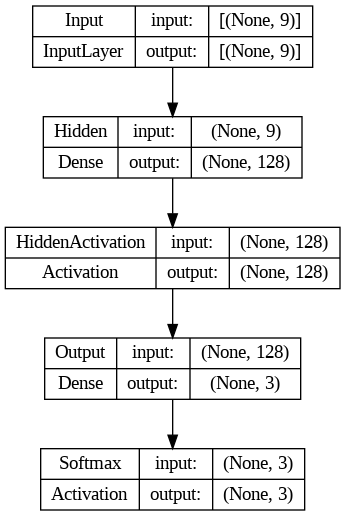

In [328]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, show_shapes = True)

In [329]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
11/11 [==============================] - 1s 25ms/step - loss: 1.0890 - Accuracy: 0.4908 - val_loss: 1.0869 - val_Accuracy: 0.5000
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 1.0604 - Accuracy: 0.5706 - val_loss: 1.0575 - val_Accuracy: 0.4714
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 1.0323 - Accuracy: 0.5399 - val_loss: 1.0317 - val_Accuracy: 0.4714
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 1.0077 - Accuracy: 0.5706 - val_loss: 1.0058 - val_Accuracy: 0.6143
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.9829 - Accuracy: 0.6748 - val_loss: 0.9826 - val_Accuracy: 0.7143
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 0.9611 - Accuracy: 0.6933 - val_loss: 0.9595 - val_Accuracy: 0.7286
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 0.9394 - Accuracy: 0.6687 - val_loss: 0.9378 - val_Accuracy: 0.7571
Epoch 8/500


In [330]:
model.save('Iris_Feedforward')

In [331]:
del model

In [332]:
model = tfk.models.load_model('Iris_Feedforward')

In [333]:
# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax(y_test, axis=-1)

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

ValueError: ignored